1. (10점) 은경, 소연, 우진, 그리고 석진은 서울의 한 카페에서 모임을 가졌다. 모임 중에, 다음의 음식들을 주문했다. 음료는 각자 계산하고, 디저트류는 4명이 동일하게 나눠서 계산하기로 했을 때 각자 얼마씩 계산을 해야하는지 python 코드를 작성하여 구하시오 (단, for 문을 포함한 코드를 작성해야함).

    - 음료
        - 아메리카노(4200원): 은경, 소연, 석진 (총 3잔)
        - 말차라떼(5000원): 우진 (총 1잔)
    - 디저트
        - 무화과바치케(6,500원): (총 1개)
        - 브라우니(4,500원): (총 1개)

2. (총 30점) 지금부터 여러분들은 자금을 받아 펀드를 운용하는 펀드매니저입니다. 어느날, 한 고객이 찾아와 돈을 맡기면서 다음의 조건에 맞는 포트폴리오를 구성해달라고 합니다. 이를 바탕으로 다음의 질문에 답하시오.

    - 다음의 주식들로 포트폴리오를 구성: 삼성전자, 엔씨소프트, SK하이닉스, 카카오, 네이버
    - 2019.1.1 ~ 2020.1.1의 일별데이터를 사용.
    - 수익률은 ${P_t - P_{t-1}}\over{P_{t-1}}$로 구함. 이때, $t$는 daily frequency를 의미함.
    - 위험자산 중 60%는 삼성전자 주식으로 구성(무위험자산은 고려 x).
    - 포트폴리오에 포함되는 모든 자산의 가중치는 0 ~ 100% 사이.
    - 위험 한 단위 대비 기대수익률이 가장 높은 포트폴리오를 구성.

- 2-1. (10점) 삼성전자의 가중치는 60%로 고정하고, 나머지 가중치들을 무작위로 부여한 random portfolio를 5,000개 생성해 위험자산들로만 이루어진 mean-variance frontier를 도출하시오.

- 2-2. (10점) Risk-free rate이 0.02 일때, 무위험자산까지 포함한 mean-variance frontier를 도출하고 최적 포트폴리오의 가중치(각 종목별로) 및 최적 포트폴리오의 annualized sharpe-ratio를 구하시오 (1년을 252일로 계산).

- 2-3. (10점) 위의 분석들을, 이번에는 '위험자산 중 60%는 삼성전자 주식으로 구성'이라는 조건을 제외하고 다시 진행하고 최적 포트폴리오의 가중치 및 annualized sharpe-ratio를 (2-2)의 것과 비교하시오. 펀드매니저로써 고객에게 어떤 포트폴리오를 추천하겠습니까?

# 1

In [13]:
name = ['은경','소연','석진','우진']
D = {}
D['은경'] = 4200
D['소연'] = 4200
D['석진'] = 4200
D['우진'] = 5000

for name in D:
    D[name]+=int((6500+4500)/len(D))

for k,v in D.items():
     print("(%s : %s원)" %(k,v), end = " ")

(은경 : 6950원) (소연 : 6950원) (석진 : 6950원) (우진 : 7750원) 

# 2-1

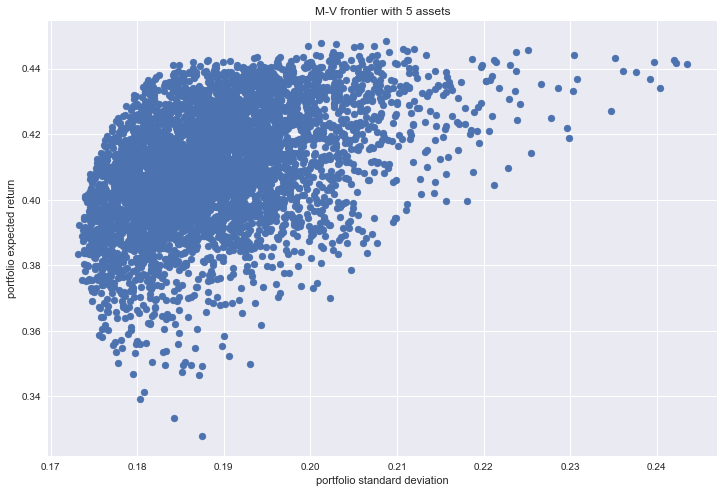

In [15]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt 
import scipy.optimize as opt

data = pd.DataFrame() 

#삼성전자, 엔씨소프트, SK하이닉스, 카카오, 네이버
for code in ['005930', '036570','000660', '035720', '035420'] : 
    data = pd.concat([data,web.DataReader(code, 'naver', start='2019-01-01', end='2020-01-01')['Close'].apply(int)], axis=1)

data.columns = ['se', 'nc', 'skh', 'kk','nvr']
noa = len(data.columns)-1 #4개
ret = data.pct_change().dropna()

port_return = []
std_list = []
var_list = []

def portfolio(weight, ret):
    weight = np.array(weight)
    port_mean = np.sum(weight*ret.mean()*252)
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std


for i in range(5000):
    weights = [0.6]
    w = np.random.random(noa)
    w /= sum(w)
    w = w*0.4
    weights = np.array(weights)
    weights = np.append(weights, w)
    for i in weights:
        i = int(i)
    
    mu,std = portfolio(weights, ret)
        
    port_return.append(mu)
    std_list.append(std)

x = port_return
y = std_list

plt.style.use('seaborn')
plt.figure(figsize=(12,8))

plt.scatter(y,x)

plt.title('M-V frontier with 5 assets')
plt.xlabel('portfolio standard deviation')
plt.ylabel('portfolio expected return')
plt.show()

# 2-2

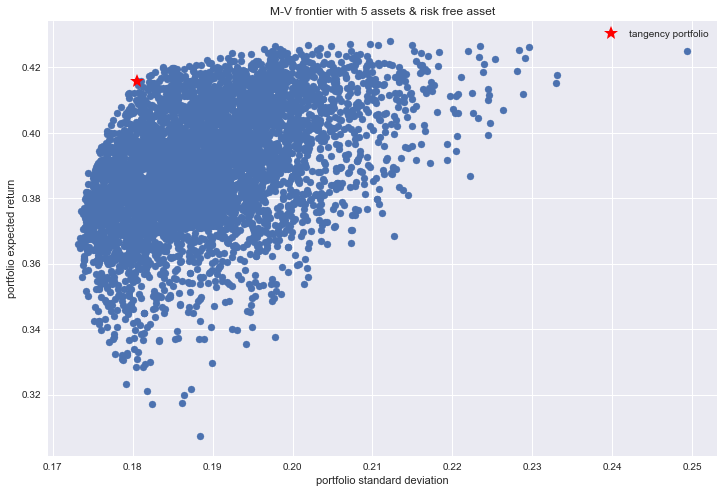

se : (0.6000) nc : (0.0075) skh : (0.0007) kk : (0.1930) nvr : (0.1988)
Annualized Sharp ratio :  2.193011407627854


In [26]:
port_return = []
std_list = []
var_list = []
rf = 0.02
noa = len(data.columns)-1

def statistics(weight, rf = 0.02):
    weight = np.array(weight)
    pret = np.sum(ret.mean() * weights) * 252 - rf
    pvol = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    return np.array([pret, pvol, pret / pvol])

store_m, store_std, s_ratio = 0, 0, 0

for i in range(5000):
    weights = [0.6]
    w = np.random.random(noa)
    w /= sum(w)
    w = w*0.4
    weights = np.array(weights)
    weights = np.append(weights, w)
    for i in weights:
        i = int(i)
    
    mu = statistics(weights)[0]
    std = np.sqrt(statistics(weights)[1])
    
    port_return.append(mu)
    std_list.append(std)
    
    if (mu-rf)/std > s_ratio :
        store_m = mu
        store_std = std
        s_ratio = (mu-rf)/std
        optimal_weight = weights
    

x = port_return
y = std_list

plt.style.use('seaborn')
plt.figure(figsize=(12,8))

plt.scatter(y,x)

plt.plot(store_std, store_m, 'r*', markersize=15.0, label = 'tangency portfolio')

plt.title('M-V frontier with 5 assets & risk free asset')
plt.xlabel('portfolio standard deviation')
plt.ylabel('portfolio expected return')
plt.legend()
plt.show()

print('se : (%.4f) nc : (%.4f) skh : (%.4f) kk : (%.4f) nvr : (%.4f)' 
     %(optimal_weight[0], optimal_weight[1], optimal_weight[2], optimal_weight[3], optimal_weight[4]))
print("Annualized Sharp ratio : ", s_ratio)

# 2-3

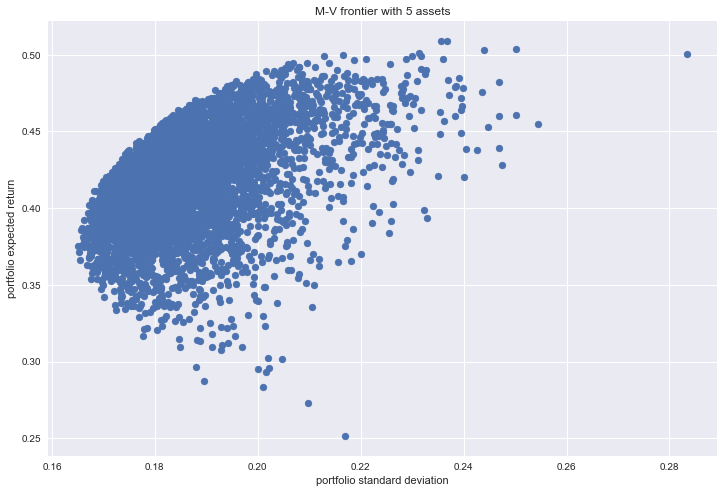

In [17]:
data = pd.DataFrame() 
for code in ['005930', '036570','000660', '035720', '035420'] : 
    data = pd.concat([data,web.DataReader(code, 'naver', start='2019-01-01', end='2020-01-01')['Close'].apply(int)], axis=1)

data.columns = ['se', 'nc', 'skh', 'kk','nvr']
noa = len(data.columns) #5개
ret = data.pct_change().dropna()

port_return = []
std_list = []
var_list = []

def portfolio(weight, ret):
    weight = np.array(weight)
    port_mean = np.sum(weight*ret.mean()*252) 
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std


for i in range(5000):
    w = np.random.random(noa)
    w /= sum(w)
    weights = w
    
    mu,std = portfolio(weights, ret)
        
    port_return.append(mu)
    std_list.append(std)

x = port_return
y = std_list

plt.style.use('seaborn')
plt.figure(figsize=(12,8))

plt.scatter(y,x)

plt.title('M-V frontier with 5 assets')
plt.xlabel('portfolio standard deviation')
plt.ylabel('portfolio expected return')
plt.show()

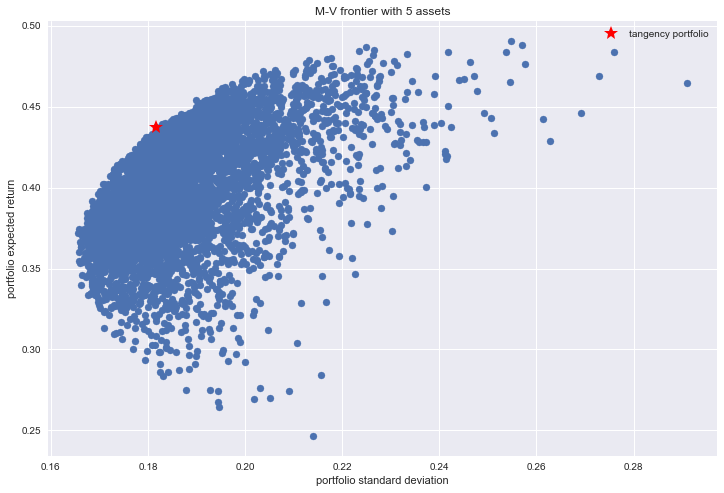

[0.31705634 0.02266445 0.10224043 0.30775022 0.25028856]
Annualized Sharp ratio :  2.296455403906577


In [20]:
port_return = []
std_list = []
var_list = []
rf = 0.02

def statistics(weight, rf = 0.02):
    weight = np.array(weight)
    pret = np.sum(ret.mean() * weights) * 252 - rf
    pvol = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    return np.array([pret, pvol, pret / pvol])

store_m, store_std, s_ratio = 0, 0, 0

for i in range(5000):
    w = np.random.random(noa)
    w /= sum(w)
    weights = w
    
    mu = statistics(weights)[0]
    std = np.sqrt(statistics(weights)[1])
    
    port_return.append(mu)
    std_list.append(std)
    
    if (mu-rf)/std > s_ratio :
        store_m = mu
        store_std = std
        s_ratio = (mu-rf)/std
        optimal_weight = weights
    

x = port_return
y = std_list

plt.style.use('seaborn')
plt.figure(figsize=(12,8))

plt.scatter(y,x)

plt.plot(store_std, store_m, 'r*', markersize=15.0, label = 'tangency portfolio')

plt.title('M-V frontier with 5 assets & risk free asset')
plt.xlabel('portfolio standard deviation')
plt.ylabel('portfolio expected return')
plt.legend()
plt.show()
print('se : (%.4f) nc : (%.4f) skh : (%.4f) kk : (%.4f) nvr : (%.4f)' 
     %(optimal_weight[0], optimal_weight[1], optimal_weight[2], optimal_weight[3], optimal_weight[4]))
print("Annualized Sharp ratio : ", s_ratio)

삼성전자 60%를 꼭 지키지 않은 포트폴리오가 sharp ratio(위험 한 단위당 기대 수익률)가 더 높게 나왔기 때문에 60%로 고정하지 않은 포트폴리오를 추천할 것이다.